# <center>Fake News Prediction<br>
To build a model to accurately classify a piece of news as REAL or FAKE.
Using sklearn, we build a TfidfVectorizer on our dataset. Then, initialize a PassiveAggressive Classifier and fit the model.</center>
# <hr>

### _Import libraries_

In [1]:
# submitted by Sneha Rane

import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### _Read the dataset_

In [2]:
df=pd.read_csv('news.csv')

print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### _Get the labels_

In [3]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### _News Analysis_

In [5]:
print(df.title.unique().size)
print(df.text.unique().size)
print(df.size)

6256
6060
25340


In [6]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [7]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

### _Visualization_

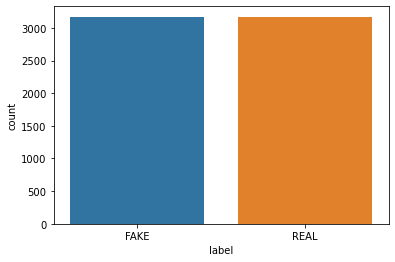

In [9]:
import seaborn as sns
sns.countplot(x='label',data=df)

In [10]:
df.groupby(['title']).size()

title
"America has a simple ideology": how one of Russia's top US experts explains America                                            1
"Political identity is fair game for hatred": how Republicans and Democrats discriminate                                        1
"Russia is concentrating" 2.0: Putin's new policy of "active defense"                                                           1
"Top Five Clinton Donors Are Jewish" - How Anti-Semitic Is This Fact?                                                           1
#2816: Clinton Pride’s 8(a) Pig Farm Bridge – Serco Zulu Server Snuff –Soros's Patented Voter Key                               1
                                                                                                                               ..
“When You Speak Up for the MOVE 9, You Speak Up for Yourself”                                                                   1
“Where is the public outcry for an explanation of how the longest war in American hi

### _Split the dataset_

In [13]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.4, random_state=0)

### _Instantiate TfidfVecorizer_

In [14]:
tfidf=TfidfVectorizer(stop_words='english', max_df=0.7)

#fit and transform train set, transform test set
tfidf_train=tfidf.fit_transform(x_train)
tfidf_test=tfidf.transform(x_test)

### _Initialize a PassiveAggressiveClassifier_

In [15]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

### _Model Evaluation_

In [16]:
#Predict on the test set and calculate accuracy into percentages
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.13%


In [17]:
#confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[1177,   90],
       [  84, 1183]], dtype=int64)

[[1177   90]
 [  84 1183]]


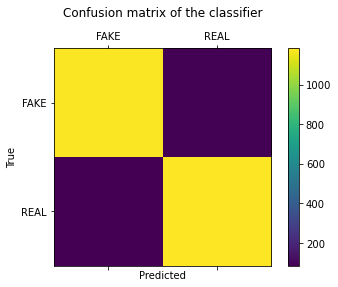

In [33]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()